In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/6000-indian-food-recipes-dataset/IndianFoodDatasetXLS.xlsx
/kaggle/input/6000-indian-food-recipes-dataset/IndianFoodDatasetCSV.csv


In [11]:
!pip install simple_colors
!pip install langdetect
!pip install googletrans==3.1.0a0
!pip install emoji
!pip install num2words
!pip install gensim

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import emoji
from bs4 import BeautifulSoup
from num2words import num2words
import plotly.graph_objects as go
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from simple_colors import *
import random
from sklearn.decomposition import PCA
import plotly.express as px
from langdetect import detect
import re
from gensim.models import Word2Vec
import string
from googletrans import Translator
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity
import warnings

warnings.filterwarnings("ignore")
nltk.download('stopwords')
nltk.download('punkt')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
df_main = pd.read_csv("/kaggle/input/6000-indian-food-recipes-dataset/IndianFoodDatasetCSV.csv", index_col=0)
print(blue(f"\n Size of the dataset: {df_main.shape} \n", 'bold'))

df_main.head() 
#Inputing the data and checking


 Size of the dataset: (6871, 14) 



,RecipeName,TranslatedRecipeName,Ingredients,TranslatedIngredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,Instructions,TranslatedInstructions,URL
Srno,,,,,,,,,,,,,,
1,Masala Karela Recipe,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...","6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...",15,30,45,6,Indian,Side Dish,Diabetic Friendly,"To begin making the Masala Karela Recipe,de-se...","To begin making the Masala Karela Recipe,de-se...",https://www.archanaskitchen.com/masala-karela-...
2,टमाटर पुलियोगरे रेसिपी - Spicy Tomato Rice (Re...,Spicy Tomato Rice (Recipe),"2-1/2 कप चावल - पका ले,3 टमाटर,3 छोटा चमच्च बी...","2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...",5,10,15,3,South Indian Recipes,Main Course,Vegetarian,टमाटर पुलियोगरे बनाने के लिए सबसे पहले टमाटर क...,"To make tomato puliogere, first cut the tomato...",http://www.archanaskitchen.com/spicy-tomato-ri...
3,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...","1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...",20,30,50,4,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,"To begin making the Ragi Vermicelli Recipe, fi...","To begin making the Ragi Vermicelli Recipe, fi...",http://www.archanaskitchen.com/ragi-vermicelli...
4,Gongura Chicken Curry Recipe - Andhra Style Go...,Gongura Chicken Curry Recipe - Andhra Style Go...,"500 grams Chicken,2 Onion - chopped,1 Tomato -...","500 grams Chicken,2 Onion - chopped,1 Tomato -...",15,30,45,4,Andhra,Lunch,Non Vegeterian,To begin making Gongura Chicken Curry Recipe f...,To begin making Gongura Chicken Curry Recipe f...,http://www.archanaskitchen.com/gongura-chicken...
5,आंध्रा स्टाइल आलम पचड़ी रेसिपी - Adrak Chutney ...,Andhra Style Alam Pachadi Recipe - Adrak Chutn...,"1 बड़ा चमच्च चना दाल,1 बड़ा चमच्च सफ़ेद उरद दाल,2...","1 tablespoon chana dal, 1 tablespoon white ura...",10,20,30,4,Andhra,South Indian Breakfast,Vegetarian,आंध्रा स्टाइल आलम पचड़ी बनाने के लिए सबसे पहले ...,"To make Andhra Style Alam Pachadi, first heat ...",https://www.archanaskitchen.com/andhra-style-a...


In [14]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6871 entries, 1 to 14211
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   RecipeName              6871 non-null   object
 1   TranslatedRecipeName    6871 non-null   object
 2   Ingredients             6865 non-null   object
 3   TranslatedIngredients   6865 non-null   object
 4   PrepTimeInMins          6871 non-null   int64 
 5   CookTimeInMins          6871 non-null   int64 
 6   TotalTimeInMins         6871 non-null   int64 
 7   Servings                6871 non-null   int64 
 8   Cuisine                 6871 non-null   object
 9   Course                  6871 non-null   object
 10  Diet                    6871 non-null   object
 11  Instructions            6871 non-null   object
 12  TranslatedInstructions  6871 non-null   object
 13  URL                     6871 non-null   object
dtypes: int64(4), object(10)
memory usage: 805.2+ KB


In [15]:
# Convert the 'TranslatedIngredients' column to string data type to ensure consistent data handling
df_main['TranslatedIngredients'] = df_main['TranslatedIngredients'].astype('str')

# Convert the 'TranslatedInstructions' column to string data type for the same reason
df_main['TranslatedInstructions'] = df_main['TranslatedInstructions'].astype('str')

# Drop rows from the DataFrame where any element is missing, to avoid processing incomplete data
# axis='index' specifies that rows should be dropped
# how='any' means that a row will be dropped if any element is missing
# inplace=True means that the DataFrame will be updated in place, without creating a new object
df_main.dropna(axis='index', how='any', inplace=True)


In [16]:
# Detecting the Different Languages available in the Translated Version of the different Columns

print("Different Languages in Recipe Name Column: ", df_main['TranslatedRecipeName'].apply(lambda text: detect(text)).unique())
print("Different Languages in Ingradients Column: ", df_main['TranslatedIngredients'].apply(lambda text: detect(text)).unique())
print("Different Languages in Recipe Instruction Column: ", df_main['TranslatedInstructions'].apply(lambda text: detect(text)).unique())

Different Languages in Recipe Name Column:  ['id' 'en' 'it' 'nl' 'de' 'es' 'pt' 'fr' 'ro' 'tl' 'af' 'hr' 'ca' 'sq'
 'lv' 'pl' 'sw' 'no' 'da' 'et' 'tr' 'so' 'sl' 'cy' 'fi' 'sv' 'cs']
Different Languages in Ingradients Column:  ['en' 'ca' 'sv' 'ro' 'mr' 'hi' 'ne' 'id' 'fr' 'pt' 'no' 'it' 'et' 'nl'
 'lt']
Different Languages in Recipe Instruction Column:  ['en' 'hi']


In [17]:
df_main.head()

,RecipeName,TranslatedRecipeName,Ingredients,TranslatedIngredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,Instructions,TranslatedInstructions,URL
Srno,,,,,,,,,,,,,,
1,Masala Karela Recipe,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...","6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...",15,30,45,6,Indian,Side Dish,Diabetic Friendly,"To begin making the Masala Karela Recipe,de-se...","To begin making the Masala Karela Recipe,de-se...",https://www.archanaskitchen.com/masala-karela-...
2,टमाटर पुलियोगरे रेसिपी - Spicy Tomato Rice (Re...,Spicy Tomato Rice (Recipe),"2-1/2 कप चावल - पका ले,3 टमाटर,3 छोटा चमच्च बी...","2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...",5,10,15,3,South Indian Recipes,Main Course,Vegetarian,टमाटर पुलियोगरे बनाने के लिए सबसे पहले टमाटर क...,"To make tomato puliogere, first cut the tomato...",http://www.archanaskitchen.com/spicy-tomato-ri...
3,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...","1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...",20,30,50,4,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,"To begin making the Ragi Vermicelli Recipe, fi...","To begin making the Ragi Vermicelli Recipe, fi...",http://www.archanaskitchen.com/ragi-vermicelli...
4,Gongura Chicken Curry Recipe - Andhra Style Go...,Gongura Chicken Curry Recipe - Andhra Style Go...,"500 grams Chicken,2 Onion - chopped,1 Tomato -...","500 grams Chicken,2 Onion - chopped,1 Tomato -...",15,30,45,4,Andhra,Lunch,Non Vegeterian,To begin making Gongura Chicken Curry Recipe f...,To begin making Gongura Chicken Curry Recipe f...,http://www.archanaskitchen.com/gongura-chicken...
5,आंध्रा स्टाइल आलम पचड़ी रेसिपी - Adrak Chutney ...,Andhra Style Alam Pachadi Recipe - Adrak Chutn...,"1 बड़ा चमच्च चना दाल,1 बड़ा चमच्च सफ़ेद उरद दाल,2...","1 tablespoon chana dal, 1 tablespoon white ura...",10,20,30,4,Andhra,South Indian Breakfast,Vegetarian,आंध्रा स्टाइल आलम पचड़ी बनाने के लिए सबसे पहले ...,"To make Andhra Style Alam Pachadi, first heat ...",https://www.archanaskitchen.com/andhra-style-a...


### Translating columns to English

- A Translator object is initialized, which will be used for language detection and translation.

- A function named translation is defined, which takes a text string as input.
- It uses the Translator object to detect the language of the input text.
- If the language is English, it returns the original text.
- Otherwise, it translates the text to English and returns the translated text.

- The translation function is applied to three columns: 'TranslatedRecipeName', 'TranslatedIngredients', and 'TranslatedInstructions'.
- The translated text is stored in new columns: 'NewTranslatedRecipeName', 'NewTranslatedIngredients', and 'NewTranslatedInstructions'.

- A message is printed to indicate that the translation process is complete.
- The original columns ('TranslatedRecipeName', 'TranslatedIngredients', 'TranslatedInstructions') are dropped from the DataFrame as they are no longer needed.

In [19]:
translator = Translator()

def translation(text):
    language = translator.detect(text)
    if language == 'en':
        return (text)
    else:
        translated_text = translator.translate(text, dest='en')
        return (translated_text.text)
    

df_main['NewTranslatedRecipeName'] = df_main['TranslatedRecipeName'].apply(lambda x: translation(x))
df_main['NewTranslatedIngredients'] = df_main['TranslatedIngredients'].apply(lambda x: translation(x))
df_main['NewTranslatedInstructions'] = df_main['TranslatedInstructions'].apply(lambda x: translation(x))

print("All the Columns have been Translated to English!")
df_main.drop(["TranslatedRecipeName", "TranslatedIngredients", "TranslatedInstructions"], axis=1, inplace=True)

All the Columns have been Translated to English!


In [20]:
# Dropping the extra columns

df = df_main.drop(['RecipeName', 'Ingredients', 'Instructions', 'URL'], axis='columns')
df.head()

,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,NewTranslatedRecipeName,NewTranslatedIngredients,NewTranslatedInstructions
Srno,,,,,,,,,,
1,15,30,45,6,Indian,Side Dish,Diabetic Friendly,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...","To begin making the Masala Karela Recipe,de-se..."
2,5,10,15,3,South Indian Recipes,Main Course,Vegetarian,Spicy Tomato Rice (Recipe),"2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...","To make tomato puliogere, first cut the tomato..."
3,20,30,50,4,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,Ragi Semi's Upama Recipe - Ragi Millet Wormisi...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...","To begin making the Ragi Vermicelli Recipe, fi..."
4,15,30,45,4,Andhra,Lunch,Non Vegeterian,Gongura Chicken Curry Recipe - Andhra Style Go...,"500 grams Chicken,2 Onion - chopped,1 Tomato -...",To begin making Gongura Chicken Curry Recipe f...
5,10,20,30,4,Andhra,South Indian Breakfast,Vegetarian,Andhra Style Aalam Paadheer Recipe - Ginger Ch...,"1 tablespoon chana dal, 1 tablespoon white ura...","To make Andhra Style Alam Pachadi, first heat ..."


In [21]:
# Detecting the Different Languages available in the Translated Version of the different Columns

print("Different Languages in Recipe Name Column: ", df['NewTranslatedRecipeName'].apply(lambda text: detect(text)).unique())
print("Different Languages in Ingradients Column: ", df['NewTranslatedIngredients'].apply(lambda text: detect(text)).unique())
print("Different Languages in Recipe Instruction Column: ", df['NewTranslatedInstructions'].apply(lambda text: detect(text)).unique())

Different Languages in Recipe Name Column:  ['id' 'en' 'nl' 'it' 'de' 'es' 'pt' 'ro' 'ca' 'tl' 'hr' 'sq' 'af' 'sw'
 'fr' 'da' 'et' 'pl' 'sl' 'lv' 'fi' 'tr' 'lt' 'sv' 'no' 'so' 'cy' 'cs']
Different Languages in Ingradients Column:  ['en' 'ca' 'nl' 'id' 'fr' 'pt' 'no' 'tl' 'et' 'ro' 'lt']
Different Languages in Recipe Instruction Column:  ['en']


In [22]:
df.describe().style.background_gradient(cmap='cividis')

,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings
count,6865.000000,6865.000000,6865.000000,6865.000000
mean,28.591260,30.833795,59.425055,5.613256
std,81.076862,34.030198,88.736882,26.233181
min,0.000000,0.000000,0.000000,1.000000
25%,10.000000,20.000000,30.000000,4.000000
50%,15.000000,30.000000,40.000000,4.000000
75%,20.000000,35.000000,55.000000,4.000000
max,2880.000000,900.000000,2925.000000,1000.000000


#### Visualizing different cuisines

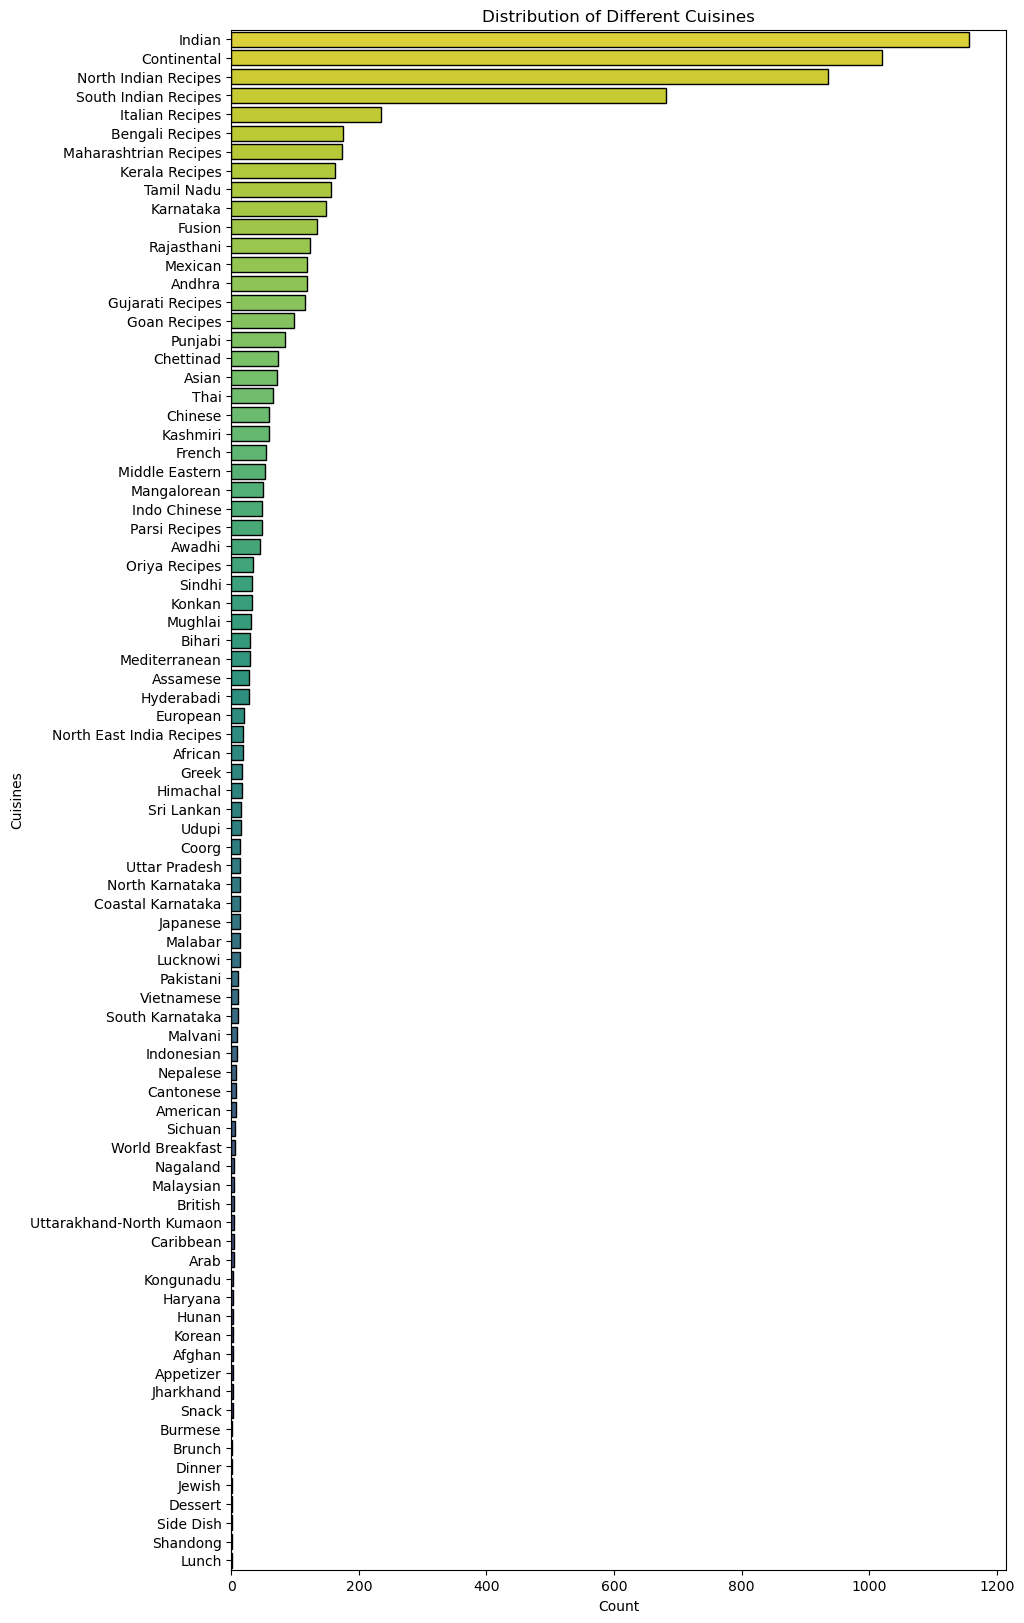

In [23]:
plt.figure(figsize=(10,20))
sns.countplot(data=df, y='Cuisine', order=df['Cuisine'].value_counts().index, palette='viridis_r', edgecolor='black');
plt.xlabel('Count')
plt.ylabel('Cuisines')
plt.title('Distribution of Different Cuisines')
plt.show()

In [24]:
pies = ['Course', 'Diet']
for i in pies:
    fig = go.Figure(data=[go.Pie(labels=df[i].explode().unique(), values=df[i].explode().value_counts())])
    fig.update_layout(margin=dict(t=40, b=40, l=0, r=0), title_text=i)
    fig.show()

True     6708
False     157
Name: TotalTimeInMins, dtype: int64


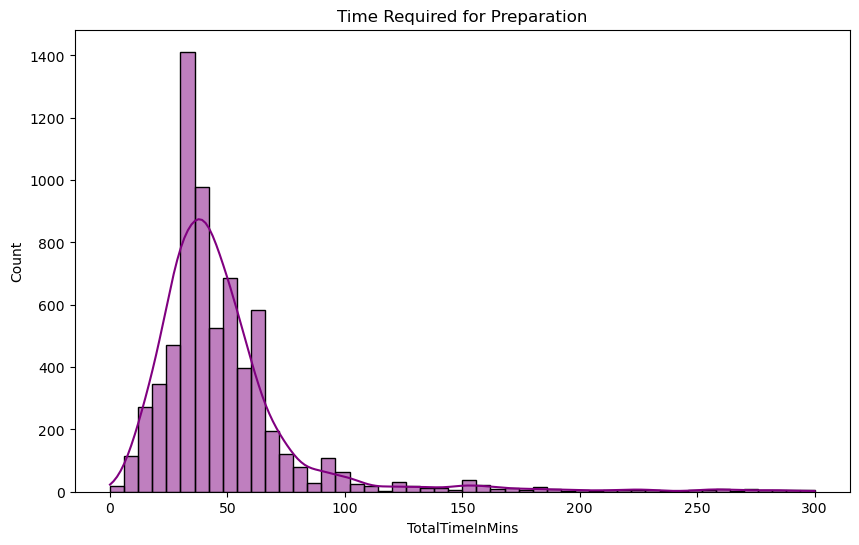

In [25]:
plt.figure(figsize=(10, 6))
mask = df['TotalTimeInMins'] <= 300
print(mask.value_counts())
sns.histplot(data=df[mask]['TotalTimeInMins'], bins=50, kde=True, color='purple');
plt.title('Time Required for Preparation')
plt.show()

#### This graph shows that maximum part of our database requires Preparation time less than 5 hours!

# Setting up a Baseline Model

## Vectorization 

This code snippet is used for feature extraction from recipe data in a DataFrame. It combines several text columns into a single column, converts the combined text into numerical features using TF-IDF vectorization, and concatenates the resulting features with the original DataFrame.

- A new column named 'combined' is created in the DataFrame df.
- This column contains concatenated text from six columns: 'NewTranslatedRecipeName', 'NewTranslatedIngredients', 'Cuisine', 'Course', 'Diet', and 'NewTranslatedInstructions'.
- A TfidfVectorizer object is initialized with a maximum of 8000 features.
- The 'combined' column is transformed into TF-IDF vectors.
- The resulting array is converted into a DataFrame named vectors.
- The indices of df and vectors are reset to ensure alignment.
- The vectors DataFrame is concatenated with the original df DataFrame along columns, resulting in a new DataFrame df_new.
- The text columns used for vectorization, as well as the 'combined' column, are dropped from df_new as they are no longer needed.
- The shape of the resulting DataFrame df_new is printed to the console.

Information about df_new, including the data types and non-null counts of its columns, is also printed.

In [26]:
df["combined"] = df["NewTranslatedRecipeName"] + " " + df["NewTranslatedIngredients"] + " " + df["Cuisine"] + " " + df["Course"] + " " + df["Diet"] + " " + df["NewTranslatedInstructions"]

vectorizer = TfidfVectorizer(max_features=8000)
vectors = vectorizer.fit_transform(df['combined']).toarray()
vectors = pd.DataFrame(vectors)

df = df.reset_index(drop=True)
vectors = vectors.reset_index(drop=True)

df_new = pd.concat([df, vectors], axis=1)
df_new.drop(["combined", "NewTranslatedRecipeName", "NewTranslatedIngredients", "Cuisine", "Course", "Diet", "NewTranslatedInstructions"], axis=1, inplace=True)
print(df_new.shape)
df_new.info()

(6865, 8004)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6865 entries, 0 to 6864
Columns: 8004 entries, PrepTimeInMins to 7999
dtypes: float64(8000), int64(4)
memory usage: 419.2 MB


Here we use clustering analysis on a DataFrame df_new containing recipe data. It performs the following steps: preparing the data, splitting it into training and test sets, running k-means clustering for different numbers of clusters, and visualizing the results using the Elbow Method.

- The column names of df_new are converted to strings. This is often done to ensure compatibility with certain functions or libraries that expect string column names.
- The data in df_new is split into training and test sets using the train_test_split function.
- 20% of the data is used for the test set (test_size=0.2), and the rest is used for the training set.
- A random state is set for reproducibility.
- K-means clustering is performed for different numbers of clusters (from 1 to 14).
- For each number of clusters, a KMeans object is initialized with the given number of clusters, and the algorithm is run on the training data.
- The within-cluster sum of squares (WCSS) for each number of clusters is stored in the list wcss.
- A plot is created to visualize the WCSS values for different numbers of clusters.

This is known as the Elbow Method, and it helps in determining the optimal number of clusters for k-means clustering.

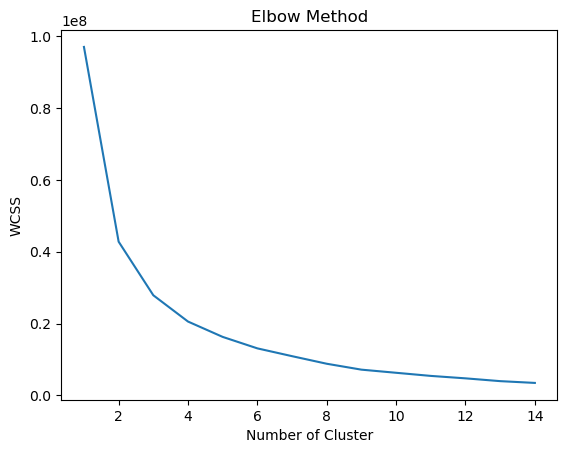

In [27]:
df_new.columns = df_new.columns.astype("str")
X_train, X_test = train_test_split(df_new, test_size=0.2, random_state=42)

wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,15), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()

### The best number of clusters seems to be at 5!

In [28]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
pred_y = kmeans.fit_predict(X_train)

#### Cluster visualization
- The code begins by importing the necessary libraries: PCA from sklearn.decomposition for Principal Component Analysis, and plotly.express as px for creating interactive plots.
- A PCA model is initialized with 3 components using PCA(n_components=3).
- The PCA model is fit to the training data X_train, and the transformed data is stored in pca_result.
- A new DataFrame pca_df is created from pca_result, with columns named 'principal component 1', 'principal component 2', and 'principal component 3'.
- The cluster labels obtained from the previously executed k-means clustering are added to pca_df as a new column named 'Cluster'.
- A 3D scatter plot is created using Plotly Express, where the x, y, and z axes represent the three principal components, and the points are colored according to their cluster labels.
- The layout of the plot is updated to remove margins.
- Finally, the plot is displayed in an interactive window using fig.show().


In [29]:
from sklearn.decomposition import PCA
import plotly.express as px

pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_train)

pca_df = pd.DataFrame(data = pca_result, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
pca_df['Cluster'] = kmeans.labels_

fig = px.scatter_3d(pca_df, x='principal component 1', y='principal component 2', z='principal component 3', opacity=0.5, color="Cluster")
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

#### Input
Here we take the users ingredients, allergies, cusinie preference and preperation time needs as input.

In [30]:
def get_user_input():
    ingredients = input("Please enter the ingredients you have (separated by commas): ").split(',')
    allergies = input("Please enter any ingredients you are allergic to (separated by commas): ").split(',')
    cuisine_pref = input("Please enter your cuisine preference: ")
    prep_time = int(input("Please enter your maximum preparation time in minutes: "))
    return ingredients, allergies, cuisine_pref, prep_time

## Overview
This code snippet defines a function recommend_recipes that recommends recipes to a user based on their input preferences such as ingredients, allergies, cuisine preference, and maximum preparation time. The function uses k-means clustering, vectorization, and distance calculations to find the most relevant recipes.

### Function Definition
The function recommend_recipes does not take any parameters and is wrapped in a try-except block to handle exceptions.
### User Input
The function begins by calling another function get_user_input (not shown in the snippet) which is assumed to return four values: ingredients, allergies, cuisine_pref, and max_prep_time.
### Vectorization
The ingredients and allergies are converted to strings and then transformed into vectors using a previously initialized vectorizer (vectorizer).
### Estimation of Preparation and Cooking Time
The maximum preparation time is divided into estimated preparation time and cooking time.
### User Vector Creation
The user vector is created by horizontally stacking the ingredients vector and additional features such as estimated preparation time, cooking time, maximum preparation time, and default servings.
### Clustering and Filtering
The function predicts the cluster of the user vector using a previously trained k-means model (kmeans).
It then finds the indices of recipes that belong to the same cluster.
These indices are further filtered based on the user's cuisine preference, total time, and servings.
### Distance Calculation and Sorting
The function calculates the distance from the user's input vector to each recipe in the same cluster.
It sorts the indices based on distance and selects the top 30 closest recipes.
### Allergy Filtering and Output
The function further filters out recipes that contain allergenic ingredients.
Finally, it prints the details of the top 5 recommended recipes, including the recipe name, ingredients, and instructions.
### Exception Handling
If any exception occurs during the execution, the function prints an error message.
### Function Call
At the end of the snippet, the function recommend_recipes is called to execute the recipe recommendation process.


In [34]:
def recommend_recipes():
    try:        
        ingredients, allergies, cuisine_pref, max_prep_time = get_user_input()

        # Vectorization of the ingredients and allergies
        ingredients_str = ', '.join(ingredients)
        allergies_str = ', '.join(allergies)
        ingredients_vector = vectorizer.transform([ingredients_str])
        allergies_vector = vectorizer.transform([allergies_str])

        # Estimation of PrepTimeInMins and CookTimeInMins
        estimated_prep_time = max_prep_time // 2
        estimated_cook_time = max_prep_time - estimated_prep_time

        default_servings = 1

        additional_features = np.array([estimated_prep_time, estimated_cook_time, max_prep_time, default_servings]).reshape(1, -1)
        user_vector = np.hstack((ingredients_vector.toarray(), additional_features))

        if user_vector.shape[1] != X_train.shape[1]:
            raise ValueError("The input vector does not have the same number of features as the training data.")

        user_cluster = kmeans.predict(user_vector)
        cluster_indices = np.where(kmeans.labels_ == user_cluster)[0]

        # Filter indices by cuisine, total time, and servings
        filtered_indices = [i for i in cluster_indices if (df.iloc[i]['Cuisine'] == cuisine_pref and df.iloc[i]['TotalTimeInMins'] <= max_prep_time and df.iloc[i]['Servings'] >= default_servings)]

        # If there are fewer than 10 recipes, try to add other close matches regardless of cuisine preference
        if len(filtered_indices) < 20:
            for i in cluster_indices:
                if i not in filtered_indices and df.iloc[i]['TotalTimeInMins'] <= max_prep_time and df.iloc[i]['Servings'] >= default_servings:
                    filtered_indices.append(i)

        if not filtered_indices:
            print("No recipes found that match your preferences.")
            return

        # Calculation of the distance from the user's input to each recipe in the same cluster
        distances = pairwise_distances(user_vector, X_train.iloc[filtered_indices])
        
        sorted_indices = np.argsort(distances)[0]
        top_indices = sorted_indices[:30]
        closest_indices = [filtered_indices[i] for i in top_indices]
        
        # Removal of recipes that contain allergenic ingredients
        recommended_recipes = df.iloc[closest_indices]
        allergy_list = allergies_str.split(',')
        for i, row in recommended_recipes.iterrows():
            ingredients = row['NewTranslatedIngredients']
            if any(re.search(r'\b' + re.escape(allergy.strip()) + r'\b', ingredients, re.IGNORECASE) for allergy in allergy_list):
                recommended_recipes = recommended_recipes.drop(i)
                
        count = 0
        for index, row in recommended_recipes.iterrows():
            if count < 5:
                print(green(f"\n Recipe Name: {row['NewTranslatedRecipeName']} \n", "bold"))
                print(red(f"Ingredients: {row['NewTranslatedIngredients']} \n", "bold"))
                print(f"Recipe: {row['NewTranslatedInstructions']}")
                print("\n" + "-" * 50 + "\n")
                count += 1
            else:
                break

                
    except Exception as e:
        print(f"An error occurred: {e}")

recommend_recipes()


# Input:
#     Please enter the ingredients you have (separated by commas):  Rice Vermicilli Noodles
#     Please enter any ingredients you are allergic to (separated by commas):  Sweet corn
#     Please enter your cuisine preference:  Chinese
#     Please enter your maximum preparation time in minutes:  60

Please enter the ingredients you have (separated by commas):  Noodles
Please enter any ingredients you are allergic to (separated by commas):  Sweet corn
Please enter your cuisine preference:  Chinese
Please enter your maximum preparation time in minutes:  60



 Recipe Name: Chicken Schezwan Momo - Steamed Chicken Dumpling Recipe 

Ingredients: 100 grams Chicken - minced,1 Carrot (Gajjar) - finely minced,1/2 Onion - finely minced,1 Green Bell Pepper (Capsicum) - finely minced,1 inch Ginger - finely minced,4 cloves Garlic - finely minced,2 tablespoons Schezwan sauce,1/2 teaspoon Black pepper powder,Salt - to taste,6 Stalk Spring Onion Greens - finely minced,1 cup All Purpose Flour (Maida),Salt - to taste 

Recipe: To begin making the Chicken Schezwan Momo Recipe, first let’s make the dough first.To make the Momo doughIn a mixing bowl, add maida, salt and add water slowly and knead to form a medium stiff dough. The dough should not be smooth and non sticky.Keep the momo dough covered for 2 hours before making Chicken Schezwan stuffing.For the Chicken Schezwan StuffingHeat a pan with some oil, add ginger and garlic that finely chopped and saute till they soften.Add onions, and saute till they turn translucent. Add in chopped carrot and bell pep

# Multilingual Food Recommendation System

## Text Preprocessing

In [35]:
df['combined'] = df["NewTranslatedRecipeName"] + " " + df["NewTranslatedIngredients"] + " " + df["NewTranslatedInstructions"] + " " + df["Cuisine"] + " " + df["Course"] + " " + df["Diet"]
df.head()

,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,NewTranslatedRecipeName,NewTranslatedIngredients,NewTranslatedInstructions,combined
0,15,30,45,6,Indian,Side Dish,Diabetic Friendly,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...","To begin making the Masala Karela Recipe,de-se...",Masala Karela Recipe 6 Karela (Bitter Gourd/ P...
1,5,10,15,3,South Indian Recipes,Main Course,Vegetarian,Spicy Tomato Rice (Recipe),"2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...","To make tomato puliogere, first cut the tomato...",Spicy Tomato Rice (Recipe) 2-1 / 2 cups rice -...
2,20,30,50,4,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,Ragi Semi's Upama Recipe - Ragi Millet Wormisi...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...","To begin making the Ragi Vermicelli Recipe, fi...",Ragi Semi's Upama Recipe - Ragi Millet Wormisi...
3,15,30,45,4,Andhra,Lunch,Non Vegeterian,Gongura Chicken Curry Recipe - Andhra Style Go...,"500 grams Chicken,2 Onion - chopped,1 Tomato -...",To begin making Gongura Chicken Curry Recipe f...,Gongura Chicken Curry Recipe - Andhra Style Go...
4,10,20,30,4,Andhra,South Indian Breakfast,Vegetarian,Andhra Style Aalam Paadheer Recipe - Ginger Ch...,"1 tablespoon chana dal, 1 tablespoon white ura...","To make Andhra Style Alam Pachadi, first heat ...",Andhra Style Aalam Paadheer Recipe - Ginger Ch...


A function text_preprocessing uis defined here for cleaning and preprocessing text data, and then applies this function to a DataFrame column named 'combined'. The function performs various text preprocessing steps such as replacing emojis with text, expanding abbreviations, removing HTML tags, URLs, and punctuation, converting text to lowercase, and tokenizing and removing stop words.

### Function Definition
* The function text_preprocessing takes a single parameter, text, which is the text string to be preprocessed.
### Stop Words
* A set of English stop words is defined, excluding certain words that are relevant to the context.
### Emoji Replacement
* Emojis in the text are replaced with their text descriptions using the emoji library.
### Abbreviations Expansion
A dictionary of common abbreviations and their full forms is defined.
The text is scanned for these abbreviations, and any occurrences are replaced with the full form.
### HTML Tags and URLs Removal
* HTML tags are removed from the text using BeautifulSoup.
* URLs are removed using regular expressions.
### Text Cleaning
* The text is converted to lowercase.
* Contractions are expanded (e.g., "I'm" becomes "I am").
* The trademark symbol is removed.
* Punctuation is removed from the text.
* Tokenization and Stop Words Removal
* The text is tokenized into words.
* Stop words are removed from the tokenized words.
### Applying the Function to DataFrame
* The text_preprocessing function is applied to the 'combined' column of the DataFrame df.
* The preprocessed text is stored back in the 'combined' column.
* The head of the DataFrame is printed to the console to view the changes.

In [36]:
def text_preprocessing(text):
    # Define English stop words while excluding synonyms or words related to 'length'
    stop_words_english = set(stopwords.words("english"))
    excluded_words_english = {"out", "up", "over", "down", "off", "under", "through"}
    stop_words = [word for word in stop_words_english if word not in excluded_words_english]
    
    # for text in lines:
    # Replace emojis with their text descriptions
    text = emoji.demojize(text)
    # Remove '_' symbol from the text after demojizing
    text = text.replace('_', ' ')
    
    # Define a dictionary of common social media abbreviations
    abbreviations = {
        "tsp": "teaspoon",
        "tbsp": "tablespoon",
        "c": "cup",
        "oz": "ounce",
        "lb": "pound",
        "g": "gram",
        "kg": "kilogram",
        "ml": "milliliter",
        "l": "liter",
        "pt": "pint",
        "qt": "quart",
        "gal": "gallon",
        "fl oz": "fluid ounce",
        "in": "inch",
        "ft": "foot",
        "pkg": "package",
        "env": "envelope",
        "doz": "dozen",
        "sm": "small",
        "med": "medium",
        "lg": "large",
        "xlg": "extra large",
        "min": "minutes",
        "hr": "hour",
        "sec": "seconds",
        "C": "Celsius",
        "F": "Fahrenheit",
        "DF": "Dairy Free",
        "GF": "Gluten Free",
        "NF": "Nut Free",
        "SF": "Sugar Free",
        "V": "Vegan",
        "VV": "Vegetarian",
        "WW": "Whole Wheat",
        "P": "Protein",
        "CHO": "Carbohydrates",
        "blk": "black",
        "gr": "green",
        "r": "red",
        "w": "white",
        "y": "yellow",
        "blk": "black",
        "BP": "Baking Powder",
        "BS": "Baking Soda",
        "evoo": "extra virgin olive oil",
        "confectioners' sugar": "powdered sugar",
        "FYI": "for your information",
        "BTW": "by the way",
    }

    # Replace '&' symbol with 'and'
    text = text.replace('&', 'and')
    # Remove HTML tags
    text = BeautifulSoup(text, 'html.parser').get_text()

    # Replace common social media abbreviations
    for abbr, full_form in abbreviations.items():
        text = re.sub(r"\b" + abbr + r"\b", full_form, text)
        
    # Remove URLs
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    text = pattern.sub('', text)
        
    # Remove remaining emojis using the provided regex
    emoji_pattern = re.compile("["
                        u"\U0001F600-\U0001FFFF"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                        u"\U0001F680-\U0001F6FF"  # transport & map symbols
                        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                        u"\U00002702-\U000027B0"
                        u"\U000024C2-\U0001F251"
                        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
        
    # Remove trademark 'R' symbol
    text = text.replace('®', '')
    
    text = text.lower()

    # Replace contractions
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)        
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text) 
    text = re.sub(r"\'ll", " will", text)  
    text = re.sub(r"\'ve", " have", text)  
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"did't", "did not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"have't", "have not", text)
    text = re.sub(r"have't", "have not", text)
        
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize and remove stop words
    tokens = word_tokenize(text)
    words = [word for word in tokens if word not in stop_words]
    for w in words:
        if w.isdigit():
            num = str(num2words(w))
            w.replace(w, num)
    text = ' '.join(words)
    return text

df['combined'] = df['combined'].apply(lambda x: text_preprocessing(x))
df.head()

,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,NewTranslatedRecipeName,NewTranslatedIngredients,NewTranslatedInstructions,combined
0,15,30,45,6,Indian,Side Dish,Diabetic Friendly,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...","To begin making the Masala Karela Recipe,de-se...",masala karela recipe 6 karela bitter gourd pav...
1,5,10,15,3,South Indian Recipes,Main Course,Vegetarian,Spicy Tomato Rice (Recipe),"2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...","To make tomato puliogere, first cut the tomato...",spicy tomato rice recipe 21 2 cups rice cooked...
2,20,30,50,4,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,Ragi Semi's Upama Recipe - Ragi Millet Wormisi...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...","To begin making the Ragi Vermicelli Recipe, fi...",ragi semis upama recipe ragi millet wormisily ...
3,15,30,45,4,Andhra,Lunch,Non Vegeterian,Gongura Chicken Curry Recipe - Andhra Style Go...,"500 grams Chicken,2 Onion - chopped,1 Tomato -...",To begin making Gongura Chicken Curry Recipe f...,gongura chicken curry recipe andhra style gong...
4,10,20,30,4,Andhra,South Indian Breakfast,Vegetarian,Andhra Style Aalam Paadheer Recipe - Ginger Ch...,"1 tablespoon chana dal, 1 tablespoon white ura...","To make Andhra Style Alam Pachadi, first heat ...",andhra style aalam paadheer recipe ginger chut...


A function generate_embedding is defined that takes a DataFrame as input and generates word embeddings for the text in the 'combined' column using the Word2Vec algorithm. The function returns a DataFrame of sentence embeddings and the trained Word2Vec model.

### Tokenization
- The function begins by tokenizing the text in the 'combined' column of the input DataFrame into sentences.

### Training Word2Vec Model 
- A Word2Vec model is trained on the tokenized sentences with a vector size of 8000, a window size of 5, a minimum word count of 1, and using 5 worker threads.

### Storing Word Vectors
- The word vectors from the trained Word2Vec model are stored in a dictionary for easy lookup.

### Calculating Sentence Vectors 
- A helper function calc_sentence_vector is defined to calculate the average word vector for a given sentence. This function tokenizes the input sentence into words, retrieves the word vectors for each word (or a zero vector if the word is not in the model), and returns the mean of these vectors.

### Applying Sentence Vector Calculation
- The calc_sentence_vector function is applied to each sentence in the 'combined' column of the input DataFrame, resulting in a series of sentence vectors.

### Creating DataFrame of Sentence Vectors
- The series of sentence vectors is converted into a DataFrame, with each row corresponding to a sentence and each column corresponding to a dimension of the embedding space.

### Function Output
- The function returns two objects: the DataFrame of sentence embeddings and the trained Word2Vec model.

### Function Call and Output
- The function is called with the DataFrame df as input, and the resulting embeddings DataFrame and Word2Vec model are stored in vectors and vectorizer, respectively. The shape of the embeddings DataFrame is printed to the console.

In [70]:
def generate_embedding(dataframe):
    # Tokenize the text in the 'combined' column of the input DataFrame
    sentences = dataframe['combined'].apply(lambda x: word_tokenize(x)).to_list()
    
    # Train a Word2Vec model on the tokenized sentences
    word2vec = Word2Vec(sentences, vector_size=800, window=5, min_count=1, workers=5)
    
    # Create a dictionary to store the word vectors
    word_vectors = {}
    for word in word2vec.wv.index_to_key:
        word_vectors[word] = word2vec.wv[word]
    
    # Define a function to calculate the average word vector for a sentence
    def calc_sentence_vector(sentence):
        words = word_tokenize(sentence)
        # Get the word vectors for each word in the sentence, using a zero vector if the word is not in the model
        vectors = [word_vectors.get(word, np.zeros(shape=800)) for word in words]
        # Return the mean of the word vectors
        return np.mean(vectors, axis=0)
    
    embeddings = dataframe['combined'].apply(calc_sentence_vector)
    
    # Convert the series of sentence vectors to a DataFrame
    embedding_df = pd.DataFrame(embeddings.to_list(), index=dataframe.index)
    return embedding_df, word2vec

vectors, vectorizer = generate_embedding(df)
vectors.shape

(6865, 800)

### Clean Dataset

In [71]:
df_clean = pd.concat([df, vectors], axis=1)
df_clean.drop(["Cuisine", "Course", "Diet", "NewTranslatedRecipeName", "NewTranslatedIngredients", "NewTranslatedInstructions", "combined"], axis=1, inplace=True)
df_clean.shape

(6865, 804)

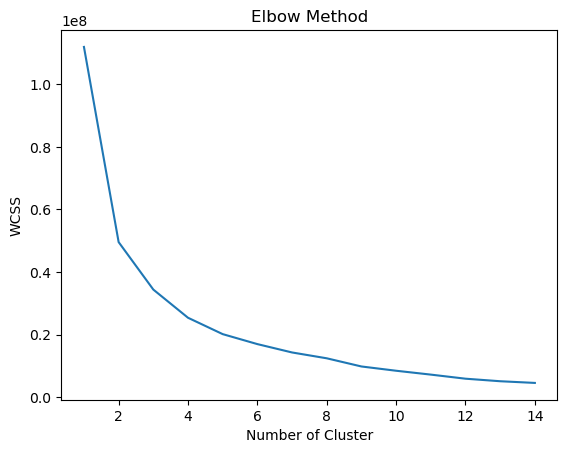

In [72]:
df_clean.columns = df_clean.columns.astype("str")
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_clean)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 15), wcss, '-')
plt.title("Elbow Method")
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()

### Best number of cluster = 5

In [73]:
kmeans = KMeans(n_clusters=5, init="k-means++", max_iter=300, n_init=10, random_state=42)
predicted_y = kmeans.fit_predict(df_clean)

In [74]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_clean)

pca_df = pd.DataFrame(data = pca_result, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
pca_df = pd.concat([df[["NewTranslatedRecipeName", "Cuisine"]], pca_df], axis=1)
pca_df['Cluster'] = kmeans.labels_

fig = px.scatter_3d(pca_df, x='principal component 1', y='principal component 2', z='principal component 3', 
                    opacity=0.6, color="Cluster", hover_data=["NewTranslatedRecipeName", "Cuisine"])
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

### Getting user information

In [75]:
def get_user_choices():
    ingredients = input("Please enter the ingredients you wish to have in your Recipe: ").lower().split(',')
    allergies = input("Please enter the intergredients you are allergic to: ").lower().split(',')
    cuisine_pref = input("Which Cuisine would you wish to have: ").lower()
    prep_time = int(input("What's the maximum preparation time you have: "))
    return ingredients, allergies, cuisine_pref, prep_time

The transform_string_to_vector function takes a string and a trained Word2Vec model (vectorizer) as input, and converts the string into a sentence vector by averaging the word vectors of the words in the string. The function returns the sentence vector as a 2D array.

### Tokenization
- The input string new_string is tokenized into individual words using the word_tokenize function.

### Word Vectors Retrieval
- For each word in the tokenized input string, the function retrieves the corresponding word vector from the trained Word2Vec model (vectorizer). If a word is not present in the model, a zero vector of the same size as the word vectors is used instead.

### Calculating Sentence Vector
- The function calculates the sentence vector by taking the mean of the word vectors along axis 0. This results in a single vector that represents the entire input string.

### Reshaping and Returning
- The sentence vector is reshaped into a 2D array with one row and as many columns as there are dimensions in the embedding space. This reshaped array is returned by the function.

In [76]:
def transform_string_to_vector(new_string, vectorizer):
    # Tokenize the input string into words
    words = word_tokenize(new_string)
    vector_size = 800
    
    # Retrieve the word vectors for each word in the input string, using a zero vector if the word is not in the model
    vectors = [vectorizer.wv[word] if word in vectorizer.wv.index_to_key else np.zeros(shape=vector_size) for word in words]
    sentence_vector = np.mean(vectors, axis=0)
    # Reshape the sentence vector to a 2D array and return it
    return sentence_vector.reshape(1, -1)

The recipes_available function takes a DataFrame as input and prints the details of up to 5 recipes from the DataFrame. The details include the recipe name, ingredients, and instructions.

### Determining Number of Rows
- The function determines the number of rows to be printed, which is the minimum of 5 or the total number of rows in the DataFrame.

### Iterating Through DataFrame
- The function iterates through each row in the DataFrame using a for loop.

### Printing Recipe Details
- For each row, the function prints the recipe name in green, the ingredients in red, and the recipe instructions in the default color. A separator line is printed after each recipe. The function uses custom green and red functions (not defined in the snippet) to print text in different colors.

### Limiting Output
- A counter is used to keep track of the number of recipes printed. The loop breaks after printing the details of the desired number of recipes (up to 5).

### Return Value
- The function does not return any value.

In [77]:
def recipes_available(dataframe):
    # Determine the number of rows to be printed (maximum of 5)
    num_rows = dataframe.shape[0]
    if num_rows > 5:
        num_rows = 5
    
    # Initialize a counter for the number of printed rows
    count = 0
    
    # Iterate through each row in the DataFrame
    for index, row in dataframe.iterrows():
        # Print the recipe details for up to 'num_rows' recipes
        if count < num_rows:
            # Print the recipe name in green
            print(green(f"\n Recipe Name: {row['NewTranslatedRecipeName']} \n", "bold"))
            # Print the ingredients in red
            print(red(f"Ingredients: {row['NewTranslatedIngredients']} \n", "bold"))
            # Print the recipe instructions
            print(f"Recipe: {row['NewTranslatedInstructions']}")
            # Print a separator line
            print("\n" + "-" * 50 + "\n")
            # Increment the counter
            count += 1
        else:
            break
    return

In [78]:
def recommend_user():
    # Get user choices for ingredients, allergies, cuisine preference, and maximum preparation time
    ingredients, allergies, cuisine_pref, max_prep_time = get_user_choices()
    
    # Convert the ingredients and cuisine preference to a string and transform it to a vector
    ingredients_str = ", ".join(ingredients) + ", " + cuisine_pref
    ingredients_vector = transform_string_to_vector(ingredients_str, vectorizer)
    
    # Convert the allergies to a string and transform it to a vector
    allergies_str = ", ".join(allergies)
    allergies_vector = transform_string_to_vector(allergies_str, vectorizer)
    
    # Estimate preparation and cooking time
    estimated_prep_time = max_prep_time // 2
    estimated_cook_time = max_prep_time - estimated_prep_time
    
    # Define default servings
    default_servings = 1
    
    # Combine additional features with the ingredients vector
    additional_features = np.array([estimated_prep_time, estimated_cook_time, max_prep_time, default_servings]).reshape(1, -1)
    user_vector = np.hstack((additional_features, ingredients_vector))
    
    # Check if the input vector has the same number of features as the dataset
    if user_vector.size != df_clean.shape[1]:
        raise ValueError("The input vector has a mismatch of features with the features in the clean dataset.")
    
    # Predict the cluster for the user's input using k-means
    user_cluster = kmeans.predict(user_vector)
    cluster_indices = np.where(kmeans.labels_ == user_cluster)[0]
    
    # Filter the indices based on user preferences
    filtered_indices = [i for i in cluster_indices if (df.iloc[i]["Cuisine"].lower() == cuisine_pref and df.iloc[i]["TotalTimeInMins"] <= max_prep_time and df.iloc[i]["Servings"] >= default_servings)]
    
    # If there are fewer than 5 recipes, try to add other close matches
    if len(filtered_indices) <= 5 and len(filtered_indices) != 0:
        print(blue("There are not enough Recipes available in the Cuisine that you wish to have but we still have these ones!", "bold"))
        recipes_available(df.iloc[filtered_indices])
        for i in cluster_indices:
            if i not in filtered_indices and df.iloc[i]['TotalTimeInMins'] <= max_prep_time and df.iloc[i]['Servings'] >= default_servings:
                filtered_indices.append(i)
    
    # If no recipes match the preferences, print a message
    if not filtered_indices:
        print("Sorry! We were unable to find recipes that match your preferences.")
        return
    
    # Calculate cosine similarity between user vector and recipes
    distances = cosine_similarity(user_vector, df_clean.iloc[filtered_indices])
    
    # Sort the indices based on similarity
    sorted_indices = np.argsort(distances)[0]
    top_indices = sorted_indices[:30]
    closest_indices = [filtered_indices[i] for i in top_indices]
    
    # Get the recommended recipes
    recommended_recipes = df.iloc[closest_indices]
    
    # Remove recipes that contain allergenic ingredients
    allergy_list = allergies_str.split(',')
    for i, row in recommended_recipes.iterrows():
        ingredient = row['NewTranslatedIngredients']
        if any(re.search(r'\b' + re.escape(allergy.strip()) + r'\b', ingredient, re.IGNORECASE) for allergy in allergy_list):
            recommended_recipes = recommended_recipes.drop(i)
            
    print (blue("\n Here are the Top 5 Recommended Recipes", "bold"))
    recipes_available(recommended_recipes)
    
    
recommend_user()

Please enter the ingredients you wish to have in your Recipe:  CHicken
Please enter the intergredients you are allergic to:  Sweet corn
Which Cuisine would you wish to have:  Indian
What's the maximum preparation time you have:  60



 Here are the Top 5 Recommended Recipes

 Recipe Name: Homemade Ghee Recipe 

Ingredients: 500 grams Butter (unsalted) 

Recipe: To begin making homemade ghee or clarified butter, first dice the butter into cubes so it melts faster when heated.Place the chopped butter in a heavy bottomed saucepan, on a medium heat. Begin to melt the butter and keep stirring occasionally until the butter melts completely.Once the butter has melted completely and has been simmered for about 5 minutes or more on medium heat you will notice that the melted butter starts to foam and boil. At this stage when you move the foam away, the liquid beneath is is still a solid yellow and not a clear liquid. This is an indication that the butter has to simmer for a longer time.Turn the heat to low and continue to simmer the butter. After a few more minutes of simmering you will notice that the colour of the liquid below the foam will begin to turn clear. At this stage the butter will foam again, and this indicates 